In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Stock_Market_Predictor/GOOG_train.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,1212.412150,1224.570048,1201.347431,1213.457483,1213.457483,1.610740e+06
std,379.454923,384.609149,375.747847,380.308660,380.308660,7.031610e+05
min,671.000000,672.299988,663.283997,668.260010,668.260010,3.468000e+05
25%,957.377518,963.404984,950.767502,958.119980,958.119980,1.184300e+06
50%,1130.574951,1142.984985,1117.374024,1132.005005,1132.005005,1.423200e+06
75%,1357.785034,1372.300995,1346.885010,1358.957519,1358.957519,1.823950e+06
max,2499.500000,2505.000000,2487.330078,2491.399902,2491.399902,6.207000e+06


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.4 MB/s 
     |████████████████████████████████| 9.8 MB 40.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import pmdarima as pm

In [ ]:
model = pm.auto_arima(np.log(df.Close), start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
#                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6711.252, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6694.664, Time=0.38 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6713.240, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6712.720, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6692.348, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-6711.254, Time=0.61 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-6709.254, Time=0.72 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-6709.686, Time=0.12 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 3.107 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1258
Model:               SARIMAX(1, 1, 0)   Log Likelihood                3359.620
Date:                Fri, 07 Oct 2022   AIC                          -6713.240
Time:                       

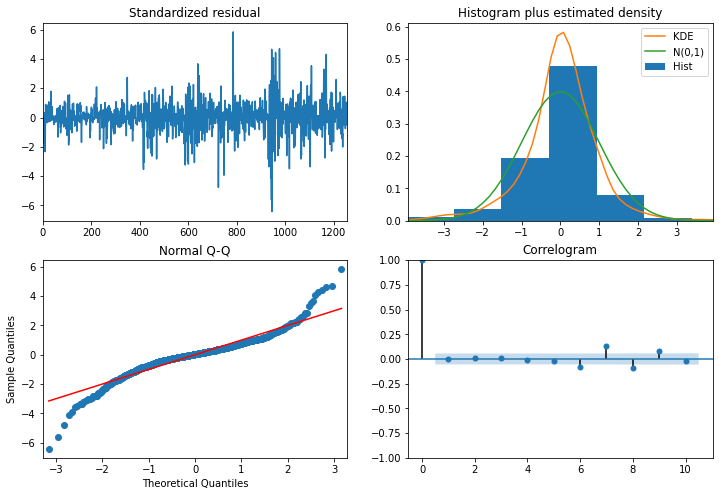

In [ ]:
model.plot_diagnostics(figsize=(12,8))
plt.show()

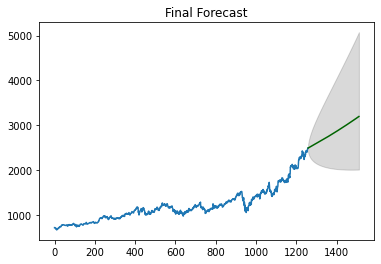

In [ ]:
# Forecast
n_periods = 253
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
fc = np.exp(fc)
confint = np.exp(confint)
index_of_fc = np.arange(len(df.Close), len(df.Close)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.Close)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast")
plt.show()

In [ ]:
dataset_test = pd.read_csv("/content/drive/MyDrive/Stock_Market_Predictor/GOOG_test.csv")
real_stock_price = dataset_test.iloc[:, 5:6].values

In [ ]:
predicted_stock_price = fc

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('R Squared is {:.2f} %'.format(r2_score(real_stock_price,predicted_stock_price)*100))
print('MSE is {:.4f}'.format(mean_squared_error(real_stock_price,predicted_stock_price)))
print('MAPE is {:.2f} %'.format(mean_absolute_percentage_error(real_stock_price,predicted_stock_price)*100))

R Squared is -224.56 %
MSE is 136434.8762
MAPE is 10.40 %


In [ ]:
# One Step ahead forecasting

In [ ]:
x_fore = []
trData = df.Close.values
for i in range(0,len(dataset_test),1):
  print(i)
#   ArModel = pm.auto_arima(np.log(trData), start_p=1, start_q=1,
#                       test='adf',       # use adftest to find optimal 'd'
#                       max_p=3, max_q=3, # maximum p and q
#                       m=1,              # frequency of series
#                       d=None,           # let model determine 'd'
# #                      seasonal=False,   # No Seasonality
#                       start_P=0, 
#                       D=0, 
#                       trace=True,
#                       error_action='ignore',  
#                       suppress_warnings=True, 
#                       stepwise=True)
  
#   loopFore = model.predict(n_periods=n_periods)
  ArModel = ARIMA(np.log(trData), order=(1, 1, 0)) 
  ArFitted = ArModel.fit()
  loopFore = ArFitted.forecast(1)
  loopFore = np.exp(loopFore)
  x_fore.append(loopFore)
  trData = np.append(trData, loopFore)

0
1
2
3
4


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


5
6
7
8
9


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


10
11
12
13
14


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


228
229
230
231
232
233
234


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252


In [ ]:
predicted_stock_price = x_fore

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('R Squared is {:.2f} %'.format(r2_score(real_stock_price,predicted_stock_price)*100))
print('MSE is {:.4f}'.format(mean_squared_error(real_stock_price,predicted_stock_price)))
print('MAPE is {:.2f} %'.format(mean_absolute_percentage_error(real_stock_price,predicted_stock_price)*100))

R Squared is -105.31 %
MSE is 86305.1735
MAPE is 9.49 %
